In [1]:
import mplfinance as mpf
import pandas as pd 
import numpy as np
import yfinance as yf
from sklearn import svm
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt 

In [2]:
#EURUSD = pd.read_csv("C:/Users/Kazem Kamrani/Desktop/ForexData/EURUSDMeta.csv",index_col = "Date" , parse_dates = True
                    #,na_values=['nan'])
df = yf.download(tickers = "JPY=X",period = "3mo",interval = "1d",group_by = 'ticker',
                 auto_adjust = True,prepost = True,threads = True,proxy = None)
df = pd.DataFrame(df)
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close  Volume
Date                                                              
2022-04-08  124.096001  124.650002  123.682999  124.096001       0
2022-04-11  124.385002  125.761002  124.302002  124.385002       0
2022-04-12  125.472000  125.742996  124.873001  125.472000       0
2022-04-13  125.416000  126.296997  125.371002  125.416000       0
2022-04-14  125.376999  125.987999  125.130997  125.376999       0
...                ...         ...         ...         ...     ...
2022-07-04  135.042999  135.770996  134.798004  135.042999       0
2022-07-05  135.839996  136.345001  135.554993  135.839996       0
2022-07-06  135.520996  135.962006  134.975006  135.520996       0
2022-07-07  135.966003  136.203995  135.570007  135.966003       0
2022-07-08  136.009995  136.565994  135.309998  136.115005       0

[66 rows x 5 columns]


In [3]:
df =df.drop(['Volume'],1)
df =df.drop(['Open'],1)
#df =df.drop(['Time'],1)
#df =df.drop(['Date'],1)
df =df['2022-01-01':]

print(df)

                  High         Low       Close
Date                                          
2022-04-08  124.650002  123.682999  124.096001
2022-04-11  125.761002  124.302002  124.385002
2022-04-12  125.742996  124.873001  125.472000
2022-04-13  126.296997  125.371002  125.416000
2022-04-14  125.987999  125.130997  125.376999
...                ...         ...         ...
2022-07-04  135.770996  134.798004  135.042999
2022-07-05  136.345001  135.554993  135.839996
2022-07-06  135.962006  134.975006  135.520996
2022-07-07  136.203995  135.570007  135.966003
2022-07-08  136.565994  135.309998  136.115005

[66 rows x 3 columns]


C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_16804\866717853.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['Volume'],1)
C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_16804\866717853.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df =df.drop(['Open'],1)


In [4]:
#gh = df['1971-01-08':'2021-06-14']
#print(gh)

In [5]:
forecast_out = int(20)
df['PredictionClose'] = df['Close'].shift(-forecast_out)
print(df)

                  High         Low       Close  PredictionClose
Date                                                           
2022-04-08  124.650002  123.682999  124.096001       130.330002
2022-04-11  125.761002  124.302002  124.385002       130.748993
2022-04-12  125.742996  124.873001  125.472000       130.376999
2022-04-13  126.296997  125.371002  125.416000       130.350998
2022-04-14  125.987999  125.130997  125.376999       129.835007
...                ...         ...         ...              ...
2022-07-04  135.770996  134.798004  135.042999              NaN
2022-07-05  136.345001  135.554993  135.839996              NaN
2022-07-06  135.962006  134.975006  135.520996              NaN
2022-07-07  136.203995  135.570007  135.966003              NaN
2022-07-08  136.565994  135.309998  136.115005              NaN

[66 rows x 4 columns]


In [6]:
X = np.array(df.drop(['PredictionClose'],1))
X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_16804\1567216897.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['PredictionClose'],1))


In [7]:
Y = np.array(df['PredictionClose'])
Y = Y[:-forecast_out]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [9]:
# Training
LR = LinearRegression()
LR.fit(X_train, Y_train)
testpredictions = LR.predict(X_test)
#Testing
confidence = LR.score(X_test,Y_test)
print("confidence:", confidence)
print('R2 Score is: ', metrics.explained_variance_score(Y_test, testpredictions))
print('Mean Squared Error is: ', metrics.mean_squared_error(Y_test, testpredictions))
print('Root Mean Squared Error is: ', np.sqrt(metrics.mean_squared_error(Y_test, testpredictions)))
print('Mean Absolute Error is: ', metrics.mean_absolute_error(Y_test, testpredictions))
print('Mean Absolute Percentage Error is: ', metrics.mean_absolute_percentage_error(Y_test, testpredictions))

confidence: 0.1657384907930427
R2 Score is:  0.1657659828488537
Mean Squared Error is:  8.645614853506727
Root Mean Squared Error is:  2.940342642194397
Mean Absolute Error is:  2.592647392344296
Mean Absolute Percentage Error is:  0.01969652600784145


In [10]:
print(X_forecast)

[[1.08053207 0.99586707 1.1429622 ]
 [1.02694287 1.07929788 0.97861994]
 [1.11635144 1.19312007 1.27689688]
 [0.94345614 0.40468556 0.94792711]
 [1.15217082 0.5881756  0.47526005]
 [1.15217082 1.26536902 1.27187295]
 [1.41080366 1.37890685 1.21913867]
 [1.48582939 1.60998976 1.54894292]
 [1.36906245 1.19226262 1.48058335]
 [1.11268472 1.21404886 1.1502171 ]
 [1.18799019 1.26135738 1.21216051]
 [1.40347022 1.43022264 1.31623684]
 [1.59920935 1.62719127 1.48699951]
 [1.54336504 1.5916377  1.63823271]
 [1.3115268  1.33618744 1.41417376]
 [1.25342306 1.33676053 1.20685983]
 [1.4153182  1.55379176 1.4292413 ]
 [1.3072963  1.3875076  1.34023251]
 [1.37554806 1.55809651 1.46440032]
 [1.47764813 1.48355081 1.50597551]]


In [11]:
forecast_prediction = LR.predict(X_forecast)
print(forecast_prediction)

[133.94478055 134.06316936 134.42677082 132.75409198 132.30211045
 134.50915211 134.22043293 134.89035481 134.15281249 134.3560393
 134.37672493 134.43664923 134.65714033 134.83071772 134.50145753
 134.41066482 134.78625072 134.54718252 134.90297216 134.59531847]


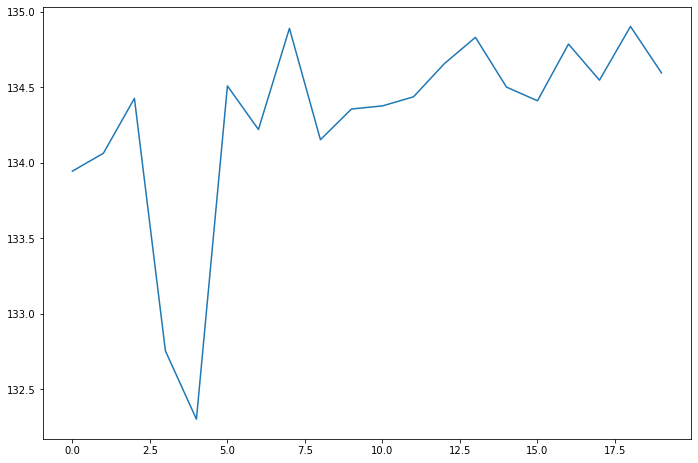

In [12]:
plt.axes([1, 2, 1.5 , 1.5])
plt.plot(forecast_prediction)


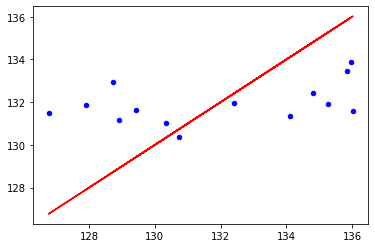

In [13]:
import matplotlib.pyplot as plt
plt.plot(figsize = (20,7))
plt.scatter(Y_test, testpredictions, color='b',s=20)
plt.plot(Y_test, Y_test, 'r')
plt.show()

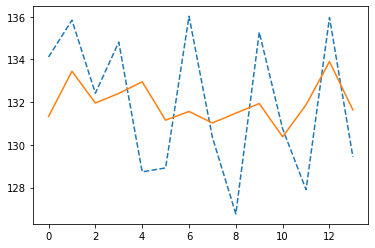

In [16]:
plt.plot(Y_test, label='test1' ,linestyle='--')
plt.plot(testpredictions, label='test2')


<AxesSubplot:xlabel='Date'>

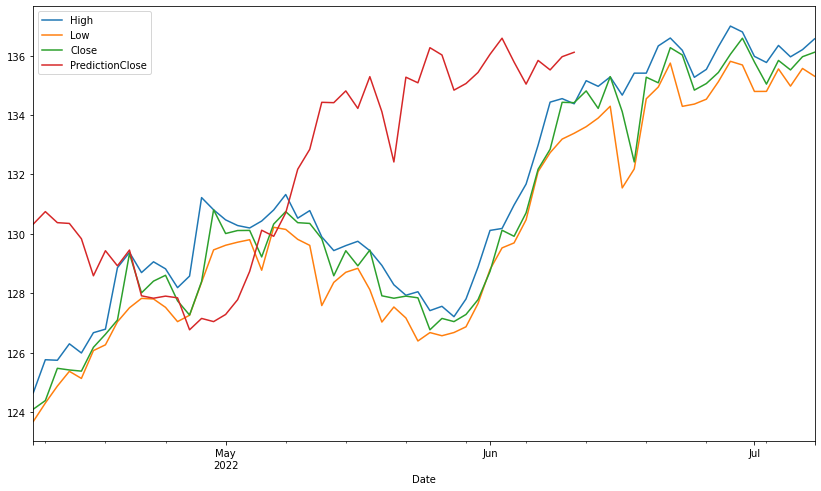

In [18]:
df.plot(figsize= (14,8))